In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_covtype

In [2]:
import time

In [3]:
# Load dataset
ds = fetch_covtype()

In [4]:
# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(ds.data, columns=ds.feature_names)

In [5]:
# Add the target variable to the dataframe
df['Cover_Type'] = ds.target

In [6]:
# Extract features and target
y = df['Cover_Type']  # output variable
X = df.drop(['Cover_Type'], axis=1)  # features to drop

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #set training and test data

In [8]:
# Start a timer for calculating the elapsed time to perform feature selection with 
# selectKBest method (f-classif) with `k`=10
skb_start_time = time.time()

#Feature selection part:
sel = SelectKBest(f_classif, k=10)  # use K-best function
X_train_t = sel.fit(X_train, y_train)  # apply the function
X_test_t = sel.transform(X_test)

# End timer
skb_end_time = time.time()
# Compute elapsed time
skb_elapsed_time = skb_end_time - skb_start_time
print("Time taken for SelectKBest's feature selection:", skb_elapsed_time, "seconds")

Time taken for SelectKBest's feature selection: 0.3582792282104492 seconds


In [13]:
print("All features:")
print(X.columns.values)

All features:
['Elevation' 'Aspect' 'Slope' 'Horizontal_Distance_To_Hydrology'
 'Vertical_Distance_To_Hydrology' 'Horizontal_Distance_To_Roadways'
 'Hillshade_9am' 'Hillshade_Noon' 'Hillshade_3pm'
 'Horizontal_Distance_To_Fire_Points' 'Wilderness_Area_0'
 'Wilderness_Area_1' 'Wilderness_Area_2' 'Wilderness_Area_3' 'Soil_Type_0'
 'Soil_Type_1' 'Soil_Type_2' 'Soil_Type_3' 'Soil_Type_4' 'Soil_Type_5'
 'Soil_Type_6' 'Soil_Type_7' 'Soil_Type_8' 'Soil_Type_9' 'Soil_Type_10'
 'Soil_Type_11' 'Soil_Type_12' 'Soil_Type_13' 'Soil_Type_14'
 'Soil_Type_15' 'Soil_Type_16' 'Soil_Type_17' 'Soil_Type_18'
 'Soil_Type_19' 'Soil_Type_20' 'Soil_Type_21' 'Soil_Type_22'
 'Soil_Type_23' 'Soil_Type_24' 'Soil_Type_25' 'Soil_Type_26'
 'Soil_Type_27' 'Soil_Type_28' 'Soil_Type_29' 'Soil_Type_30'
 'Soil_Type_31' 'Soil_Type_32' 'Soil_Type_33' 'Soil_Type_34'
 'Soil_Type_35' 'Soil_Type_36' 'Soil_Type_37' 'Soil_Type_38'
 'Soil_Type_39']


In [9]:
x_train_2 = sel.transform(X_train)
x_test_2 = sel.transform(X_test)

In [10]:
# random forest classifier with n_estimators=10 (default)
classifier = RandomForestClassifier()
classifier = classifier.fit(x_train_2,y_train)

In [11]:
ac_2 = accuracy_score(y_test,classifier.predict(x_test_2))
print('Accuracy is: ',ac_2)

Accuracy is:  0.7077444183596896


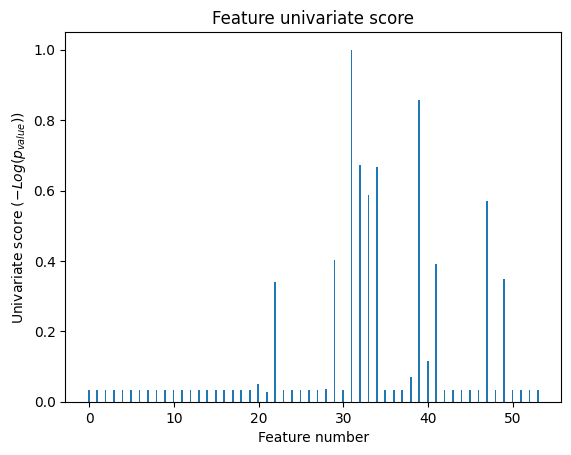

In [12]:
eps = 1e-10  # Small positive value
scores = -np.log10(np.where(sel.pvalues_ > 0, sel.pvalues_, eps))
scores /= scores.max()
X_indices = np.arange(X.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

In [14]:
sel.pvalues_

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       1.09931565e-016, 2.26989646e-009, 9.63180967e-107, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       4.05425155e-012, 5.17699505e-126, 0.00000000e+000, 3.91397538e-311,
       1.30350008e-209, 6.08548568e-183, 1.67690813e-207, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 3.70979471e-022, 2.09865027e-266,
       1.21720001e-036, 1.41008329e-122, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.42072561e-177,
       0.00000000e+000, 8.52388061e-109, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0